In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data loading...

In [2]:
df1=pd.read_csv('H:/Python/Singapore/ResaleFlatPrices/Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv')
df2=pd.read_csv('H:/Python/Singapore/ResaleFlatPrices/Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv')
df3=pd.read_csv('H:/Python/Singapore/ResaleFlatPrices/Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv')
df4=pd.read_csv('H:/Python/Singapore/ResaleFlatPrices/Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv')
df5=pd.read_csv('H:/Python/Singapore/ResaleFlatPrices/Resale flat prices based on registration date from Jan-2017 onwards.csv')

In [3]:
print(df1.columns)
print(df2.columns)
print(df3.columns)
print(df4.columns)
print(df5.columns)

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')
Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')
Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price'],
      dtype='object')
Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')
Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')


Note: df4 and df5 have extra feature remaining lease, so let's start analysis with them

## Data Preprocessing

In [4]:
df=pd.concat([df4, df5], axis=0)
df.reset_index(drop=True, inplace=True)

In [5]:
df.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0


In [6]:
#Dimensions
df.shape

(229766, 11)

In [7]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [8]:
#Functions to determine the all possible missing values from all columns
def detect_missing_values(col):
    missing_value = ["NaN", "NONE", "None", "Nil", "nan", "none", "nil", 0]
    print('There are {} missing values in the dataframe(df)'.format(len(df[df[col].isin(missing_value)])))
    df[df[col].isin(missing_value)]

In [9]:
detect_missing_values('resale_price')

There are 0 missing values in the dataframe(df)


Note : There is no possible null values in all the df columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229766 entries, 0 to 229765
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                229766 non-null  object 
 1   town                 229766 non-null  object 
 2   flat_type            229766 non-null  object 
 3   block                229766 non-null  object 
 4   street_name          229766 non-null  object 
 5   storey_range         229766 non-null  object 
 6   floor_area_sqm       229766 non-null  float64
 7   flat_model           229766 non-null  object 
 8   lease_commence_date  229766 non-null  int64  
 9   remaining_lease      229766 non-null  object 
 10  resale_price         229766 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 19.3+ MB


In [11]:
#converting the object dtype to datetiem dtype
df['month']=pd.to_datetime(df['month'], format='%Y-%m') #to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229766 entries, 0 to 229765
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                229766 non-null  datetime64[ns]
 1   town                 229766 non-null  object        
 2   flat_type            229766 non-null  object        
 3   block                229766 non-null  object        
 4   street_name          229766 non-null  object        
 5   storey_range         229766 non-null  object        
 6   floor_area_sqm       229766 non-null  float64       
 7   flat_model           229766 non-null  object        
 8   lease_commence_date  229766 non-null  int64         
 9   remaining_lease      229766 non-null  object        
 10  resale_price         229766 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 19.3+ MB


Note: ML dont directly understand the datetime format so we need to split

In [12]:
df.head(1)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0


In [13]:
df['year']=df['month'].dt.year
df['month']=df['month'].dt.month

In [14]:
df.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year
0,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,2015
1,1,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,2015


## Categorical Variables

In [15]:
#Count of Categorical variables
print('Number of Towns in Singapore ',df.town.nunique())
print('Number of Flat types ',df.flat_type.nunique())
print('Number of Building Floor ranges ',df.storey_range.nunique())
print('Number Flat Models ',df.flat_model.nunique())


Number of Towns in Singapore  26
Number of Flat types  7
Number of Building Floor ranges  17
Number Flat Models  21


In [16]:
#Categorical String variables
df.town.unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [17]:
df.flat_type.unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [18]:
df.flat_model.value_counts()

flat_model
Model A                   78705
Improved                  56816
New Generation            30159
Premium Apartment         25225
Simplified                 9260
Apartment                  8546
Maisonette                 6468
Standard                   6402
DBSS                       3364
Model A2                   2789
Type S1                     448
Model A-Maisonette          412
Adjoined flat               387
Type S2                     224
2-room                      143
Terrace                     126
Premium Apartment Loft      114
Multi Generation             84
3Gen                         46
Improved-Maisonette          32
Premium Maisonette           16
Name: count, dtype: int64

#### Understanding about the Flat models:

* Standard: (1/2/3/4/5-room). 1960s HDB. Had WC and shower in same room. 5-room Standard were introduced in 1974.
* Improved: (1/2/3/4/5-room). Introduced in 1966, the 3/4-room having separate WC and shower, they also featured void decks. 5-room Improved were introduced in 1974.
* New Generation: Started first in 1975, New Generation flats can be 3-Room (67 / 82 sqm) or 4-Room (92 sqm), featuring en-suite toilet for master bedroom, with pedestal type Water Closet, plus store room.
* Model A: Introduced in 1981: 3-Room (75 sqm), 4-Room (105 sqm), 5-Room (135 sqm), 5-Room Maisonette (139 sqm)
* Model A2: Smaller units of Model A. e.g., 4-Room Model A2 (90 sqm)
* Simplified: Introduced in 1984: 3-Room (64 sqm), 4-Room (84 sqm)
* Multi Generation: 3Gen flats designed to meet the needs of multi-generation families.
* Maisonette: AKA Model A Maisonette — 2 storeys HDB flat
* Premium Apartment: Introduced somewhere during 1990s, featuring better quality finishes, you get them in ready-to-move condition, with flooring, kitchen cabinets, built-in wardrobes
* Executive Maisonette: More premium version of Model A Maisonettes. These units are no longer being built after being replaced by the Executive Condominium (EC) scheme in 1995
* Executive Apartment: Executive Apartment / Maisonette (146-150 sqm) were introduced in 1983 and replaced 5-Room Model A flats, in addition of the 3-bedroom and separate living/dining found in 5A flats, EA and EM feature an utility/maid room. 80% of Executive units were Maisonettes and 20% were Apartments.
* DBBS: public apartments built under the HDB's short-lived Design, Build and Sell Scheme (DBSS) from 2005 to 2012. They are a unique (and premium) breed of HDB flats in Singapore, which are built by private developers. High Prices. Quite similiar to Executive Condominium except DBBS is like a premium HDB without facilities of private condos
* Adjoined Flat: Large HDB flats which are combined from 2 HDB flats
Terrace: HDB terrace flats built before HDB, without realizing Singapore's land constraint. Discontinued
* Type S1S2: apartments at The Pinnacle@Duxton are classified as "S" or Special apartments in view of its historical significance and award-winning design. For application of HDB policies, S1 and S2 apartments will be treated as 4-room and 5-room flats respectively
* 2-room: Most likely refers to 2-room flexi where there is 1 bedroom and 1 common area

In [19]:
df.storey_range.unique()

array(['07 TO 09', '01 TO 03', '13 TO 15', '10 TO 12', '04 TO 06',
       '19 TO 21', '16 TO 18', '22 TO 24', '25 TO 27', '28 TO 30',
       '34 TO 36', '46 TO 48', '31 TO 33', '37 TO 39', '43 TO 45',
       '40 TO 42', '49 TO 51'], dtype=object)

Using split method to convert the object type datatype to integer

In [20]:
df[['floors_start', 'floors_end']]=df['storey_range'].str.split(' TO ',expand=True)

In [21]:
df.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,floors_start,floors_end
0,1,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,2015,07,09
1,1,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,2015,01,03


In [22]:
#Dropping column storey_range
df.drop(columns=['storey_range'], inplace=True)

In [23]:
print(df.floors_start.dtype)
print(df.floors_end.dtype)

object
object


In [24]:
#type converstion
df['floors_start']=df['floors_start'].astype(int)
df['floors_end']=df['floors_end'].astype(int)

In [25]:
print(df.floors_start.dtype)
print(df.floors_end.dtype)

int64
int64


In [26]:
df.select_dtypes(["object"]).columns

Index(['town', 'flat_type', 'block', 'street_name', 'flat_model',
       'remaining_lease'],
      dtype='object')

In [27]:
#Adding new columns as address
df['address']=df['block']+' '+df['street_name']

In [28]:
df.address

0          174 ANG MO KIO AVE 4
1         541 ANG MO KIO AVE 10
2          163 ANG MO KIO AVE 4
3         446 ANG MO KIO AVE 10
4         557 ANG MO KIO AVE 10
                  ...          
229761       358 YISHUN RING RD
229762       352 YISHUN RING RD
229763         277 YISHUN ST 22
229764         293 YISHUN ST 22
229765         824 YISHUN ST 81
Name: address, Length: 229766, dtype: object

In [29]:
#dropping the block and street column
df=df.drop(columns=['block', 'street_name'])

In [30]:
df.head(2)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,floors_start,floors_end,address
0,1,ANG MO KIO,3 ROOM,60.0,Improved,1986,70,255000.0,2015,7,9,174 ANG MO KIO AVE 4
1,1,ANG MO KIO,3 ROOM,68.0,New Generation,1981,65,275000.0,2015,1,3,541 ANG MO KIO AVE 10


In [31]:
#Dealing remining lease years columns
# Convert remaining_lease to number of years
def get_years(text):
    if isinstance(text, str):
        yearmonth=[int(i) for i in text.split() if i.isdigit()]
        if len(yearmonth)>1: #there are year and months
            years=yearmonth[0] + (yearmonth[1]/12)
        else: # if only year
            years=yearmonth[0]    
        return round(years, 2)
    else:
        return text    

In [32]:
get_years('63 years 07 months') #7/12 =0.58

63.58

In [33]:
df['remaining_lease']=df['remaining_lease'].apply(lambda x : get_years(x))

In [34]:
df.head(2)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,floors_start,floors_end,address
0,1,ANG MO KIO,3 ROOM,60.0,Improved,1986,70.0,255000.0,2015,7,9,174 ANG MO KIO AVE 4
1,1,ANG MO KIO,3 ROOM,68.0,New Generation,1981,65.0,275000.0,2015,1,3,541 ANG MO KIO AVE 10


In [35]:
df.select_dtypes('object').columns

Index(['town', 'flat_type', 'flat_model', 'address'], dtype='object')

In [36]:
df.remaining_lease.value_counts()

remaining_lease
68.00    2633
95.00    2433
67.00    2224
69.00    1915
71.00    1787
         ... 
97.58       1
97.25       1
96.83       1
97.08       1
41.25       1
Name: count, Length: 677, dtype: int64

In [37]:
df.head(1)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,floors_start,floors_end,address
0,1,ANG MO KIO,3 ROOM,60.0,Improved,1986,70.0,255000.0,2015,7,9,174 ANG MO KIO AVE 4


In [38]:
#Renaming the columns
df=df.rename(columns={'lease_commence_date': 'lease_commence_year', 'remaining_lease': 'remaining_lease_years'})

In [39]:
df.head(1)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_year,remaining_lease_years,resale_price,year,floors_start,floors_end,address
0,1,ANG MO KIO,3 ROOM,60.0,Improved,1986,70.0,255000.0,2015,7,9,174 ANG MO KIO AVE 4


In [40]:
#Rearranging the column names
new_order=['year', 'month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'address', 'floors_start', 'floors_end', 'lease_commence_year', 'remaining_lease_years', 'resale_price']
df=df[new_order]

In [41]:
df.head(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,floors_start,floors_end,lease_commence_year,remaining_lease_years,resale_price
0,2015,1,ANG MO KIO,3 ROOM,60.0,Improved,174 ANG MO KIO AVE 4,7,9,1986,70.0,255000.0
1,2015,1,ANG MO KIO,3 ROOM,68.0,New Generation,541 ANG MO KIO AVE 10,1,3,1981,65.0,275000.0


## Encoding Categorical Variables

In [42]:
df[['town', 'flat_type', 'flat_model']]

,town,flat_type,flat_model
0,ANG MO KIO,3 ROOM,Improved
1,ANG MO KIO,3 ROOM,New Generation
2,ANG MO KIO,3 ROOM,New Generation
3,ANG MO KIO,3 ROOM,New Generation
4,ANG MO KIO,3 ROOM,New Generation
...,...,...,...
229761,YISHUN,EXECUTIVE,Maisonette
229762,YISHUN,EXECUTIVE,Maisonette
229763,YISHUN,EXECUTIVE,Maisonette
229764,YISHUN,EXECUTIVE,Apartment


In [43]:
#Choosing Label encoding technique for the feature Town
#Ordinal for ordinal relationship features such as flat_type and flat_model (example :5 ROOM>4 ROOM >3 ROOM)

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
df['town']=LabelEncoder().fit_transform(df['town'])
df['flat_type']=OrdinalEncoder().fit_transform(df[['flat_type']])
df['flat_model']=OrdinalEncoder().fit_transform(df[['flat_model']])

In [44]:
df.columns

Index(['year', 'month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'address', 'floors_start', 'floors_end', 'lease_commence_year',
       'remaining_lease_years', 'resale_price'],
      dtype='object')

In [45]:
print('Displaying the encoded variables')
print('Town \n',df.town.unique())
print('-----------------------------------------------------------------')
print('Flat Type \n',df.flat_type.unique())
print('-----------------------------------------------------------------')
print('Flat Model \n',df.flat_model.unique())
print('-----------------------------------------------------------------')

Displaying the encoded variables
Town 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
-----------------------------------------------------------------
Flat Type 
 [2. 3. 4. 1. 5. 0. 6.]
-----------------------------------------------------------------
Flat Model 
 [ 5. 12.  8. 17. 16. 13.  7.  3. 10. 19. 20.  2. 18.  4.  9. 15. 11. 14.
  6.  0.  1.]
-----------------------------------------------------------------


In [46]:
df.head(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,floors_start,floors_end,lease_commence_year,remaining_lease_years,resale_price
0,2015,1,0,2.0,60.0,5.0,174 ANG MO KIO AVE 4,7,9,1986,70.0,255000.0
1,2015,1,0,2.0,68.0,12.0,541 ANG MO KIO AVE 10,1,3,1981,65.0,275000.0


In [47]:
df.address.nunique()

9616

In [48]:
df.shape

(229766, 12)

In [49]:
#Interpretation
avg=224252/9595
print('Singapore Average Number of Flats in each Street :',round(avg))

Singapore Average Number of Flats in each Street : 23


## Correlation Analysis

In [50]:
matrix=df.drop('address', axis=1)
corr_matrix=matrix.corr()
corr_matrix

,year,month,town,flat_type,floor_area_sqm,flat_model,floors_start,floors_end,lease_commence_year,remaining_lease_years,resale_price
year,1.000000,-0.073402,0.024033,-0.015299,-0.024701,-0.030652,0.034458,0.034458,0.185623,-0.004662,0.330772
month,-0.073402,1.000000,0.006142,0.005542,0.003123,-0.004929,-0.001758,-0.001758,0.004846,-0.000559,0.001074
town,0.024033,0.006142,1.000000,0.110040,0.100228,-0.089206,-0.052137,-0.052137,0.213981,0.213557,-0.034283
flat_type,-0.015299,0.005542,0.110040,1.000000,0.951388,-0.327939,0.038002,0.038002,0.206683,0.214480,0.603975
floor_area_sqm,-0.024701,0.003123,0.100228,0.951388,1.000000,-0.350269,-0.005894,-0.005894,0.143610,0.152422,0.592277
flat_model,-0.030652,-0.004929,-0.089206,-0.327939,-0.350269,1.000000,-0.040561,-0.040561,-0.129130,-0.126588,-0.231810
floors_start,0.034458,-0.001758,-0.052137,0.038002,-0.005894,-0.040561,1.000000,1.000000,0.275270,0.272821,0.353576
floors_end,0.034458,-0.001758,-0.052137,0.038002,-0.005894,-0.040561,1.000000,1.000000,0.275270,0.272821,0.353576
lease_commence_year,0.185623,0.004846,0.213981,0.206683,0.143610,-0.129130,0.275270,0.275270,1.000000,0.981255,0.379663
remaining_lease_years,-0.004662,-0.000559,0.213557,0.214480,0.152422,-0.126588,0.272821,0.272821,0.981255,1.000000,0.320874


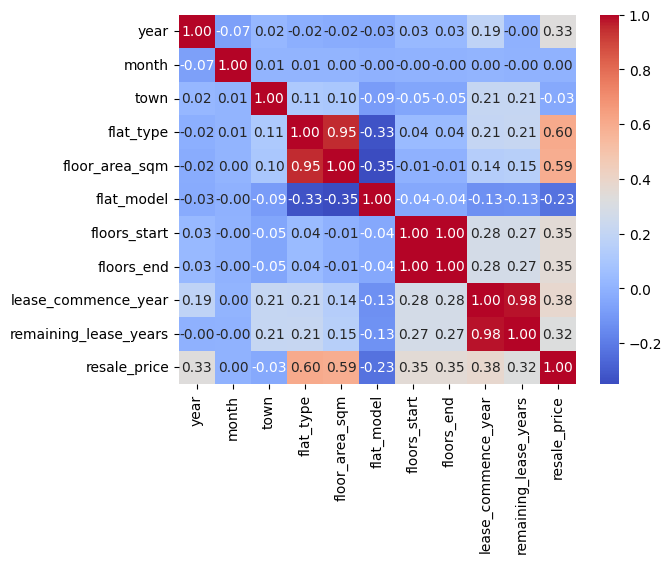

In [51]:
#plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Interpretation:

We can clearly see that the features combinations of (floor area sqm & flat type) and (lease commence year & remaining lease year) have the highest correlations, 0.95 and 0.98 respectively.

In [52]:
#Duplication records
duplicates=df[df.duplicated()]
duplicates

,year,month,town,flat_type,floor_area_sqm,flat_model,address,floors_start,floors_end,lease_commence_year,remaining_lease_years,resale_price
661,2015,1,14,2.0,65.0,5.0,57 GEYLANG BAHRU,16,18,1974,58.00,315000.0
2166,2015,2,22,2.0,69.0,5.0,403 TAMPINES ST 41,7,9,1985,69.00,350000.0
3896,2015,4,1,3.0,93.0,12.0,701 BEDOK RESERVOIR RD,10,12,1980,64.00,400000.0
4246,2015,4,9,2.0,67.0,12.0,714 CLEMENTI WEST ST 2,10,12,1980,64.00,300000.0
5493,2015,5,1,2.0,68.0,12.0,409 BEDOK NTH AVE 2,7,9,1980,63.00,340000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
224074,2024,8,11,3.0,93.0,8.0,997A BUANGKOK CRES,4,6,2018,93.33,595000.0
224673,2024,8,17,3.0,93.0,8.0,220B SUMANG LANE,7,9,2018,93.42,645000.0
224889,2024,8,19,3.0,85.0,8.0,508C WELLINGTON CIRCLE,7,9,2004,79.08,520000.0
227273,2024,9,20,2.0,68.0,8.0,471C FERNVALE ST,1,3,2016,91.08,475000.0


In [53]:
#dropping duplications
df1=df.drop_duplicates()
df1.reset_index(drop=True, inplace=True)

In [54]:
df1.head(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,floors_start,floors_end,lease_commence_year,remaining_lease_years,resale_price
0,2015,1,0,2.0,60.0,5.0,174 ANG MO KIO AVE 4,7,9,1986,70.0,255000.0
1,2015,1,0,2.0,68.0,12.0,541 ANG MO KIO AVE 10,1,3,1981,65.0,275000.0


In [55]:
#removing the poor correlation feature month and address
df1=df1.drop(columns=['month', 'address'])
df1.head(2)

,year,town,flat_type,floor_area_sqm,flat_model,floors_start,floors_end,lease_commence_year,remaining_lease_years,resale_price
0,2015,0,2.0,60.0,5.0,7,9,1986,70.0,255000.0
1,2015,0,2.0,68.0,12.0,1,3,1981,65.0,275000.0


## Exploratory Data Analysis(EDA)

In [56]:
#Function to determine the data outliers and data distributions
def outlier(df, col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x=col)
    plt.title(f'{col} outlier')

    plt.subplot(1,2,2)
    sns.histplot(data=df, x=col, kde=True, bins=50, color='red')
    plt.title(f'Distribution plot for {col}')

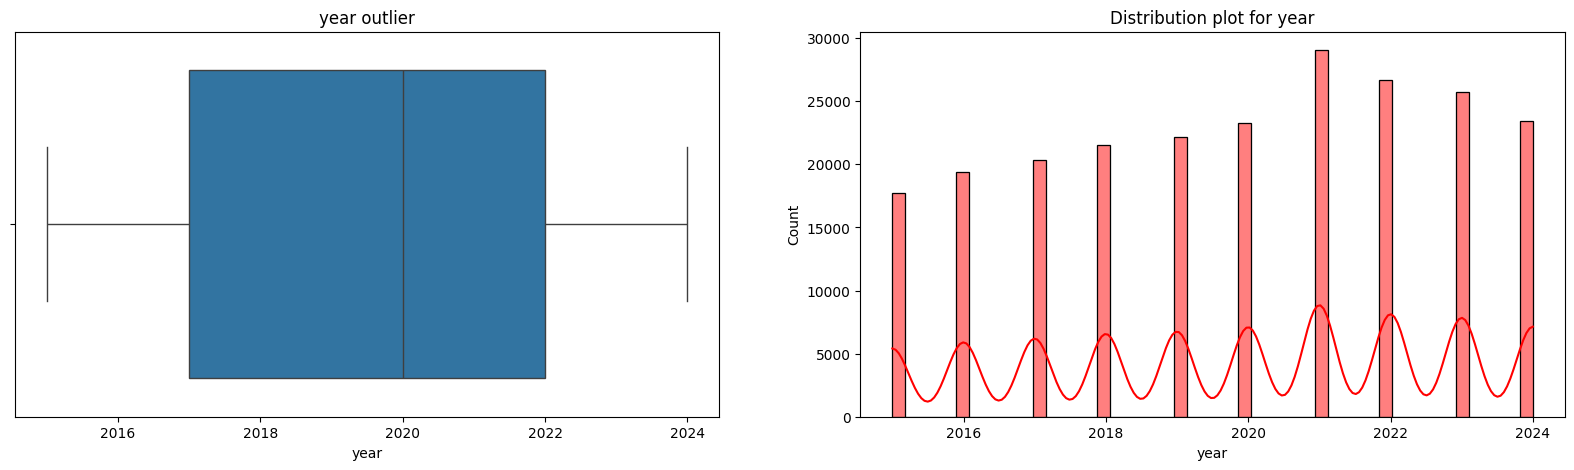

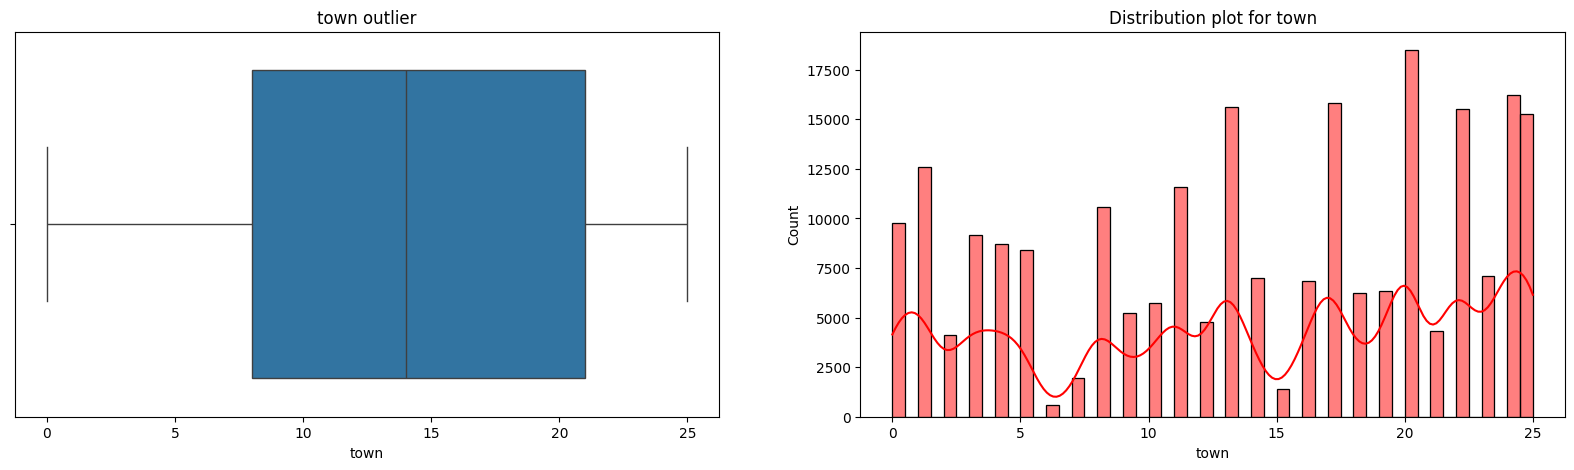

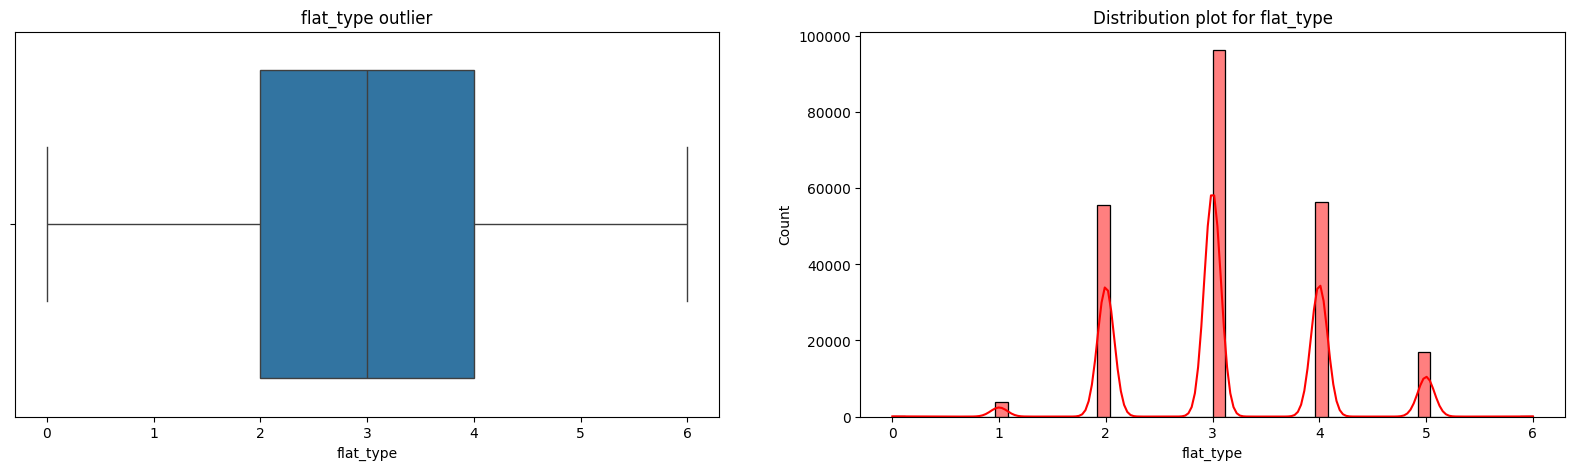

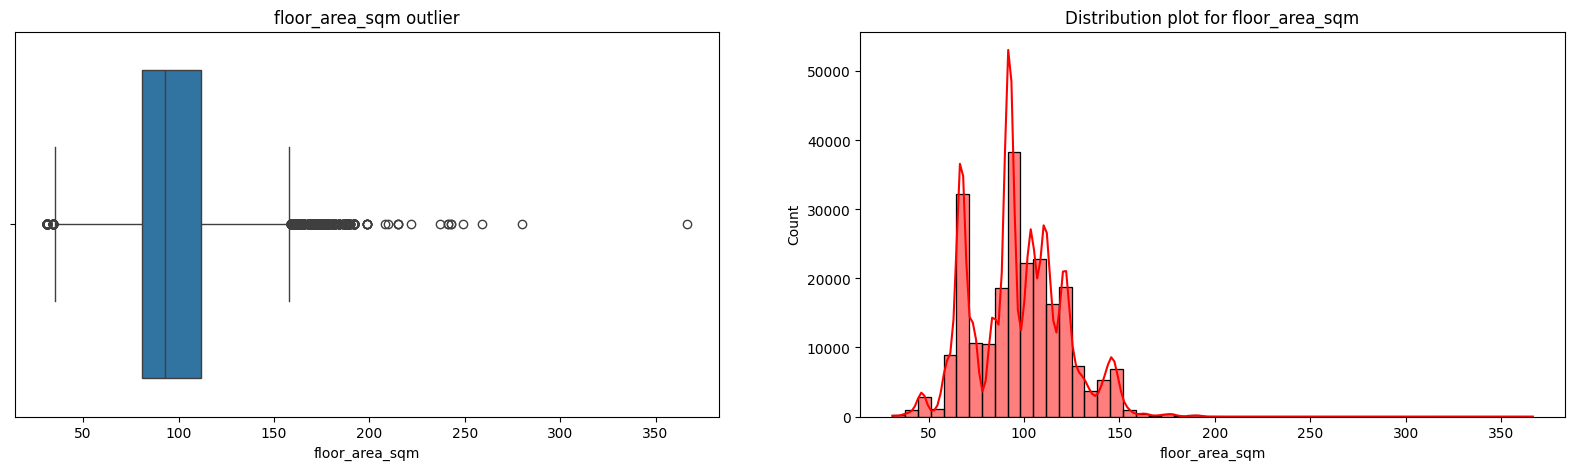

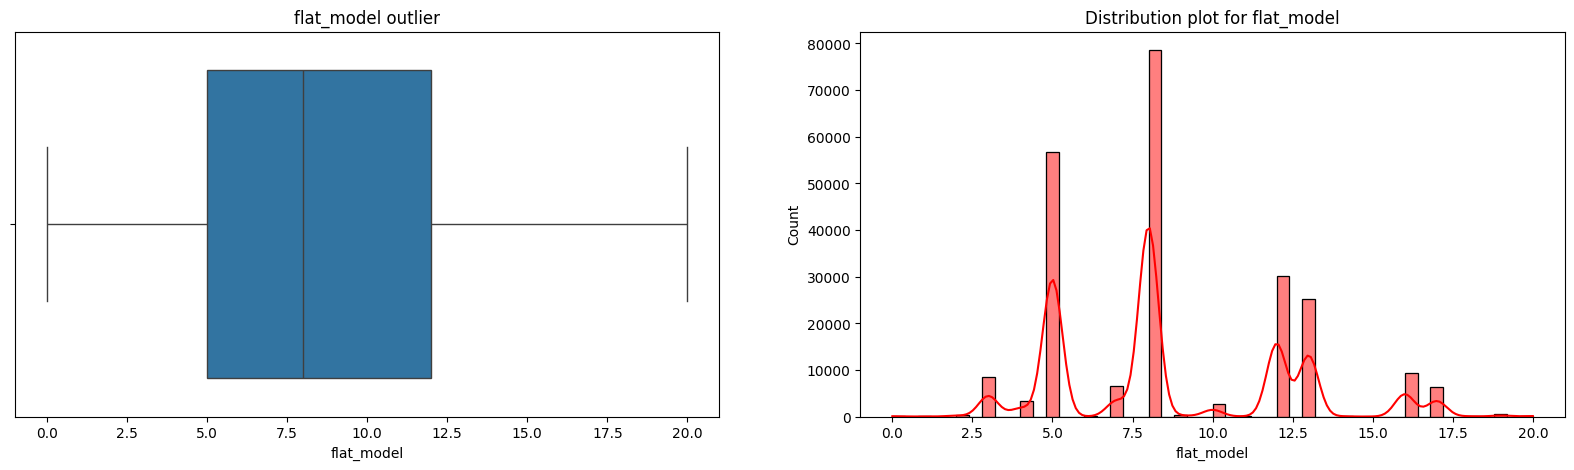

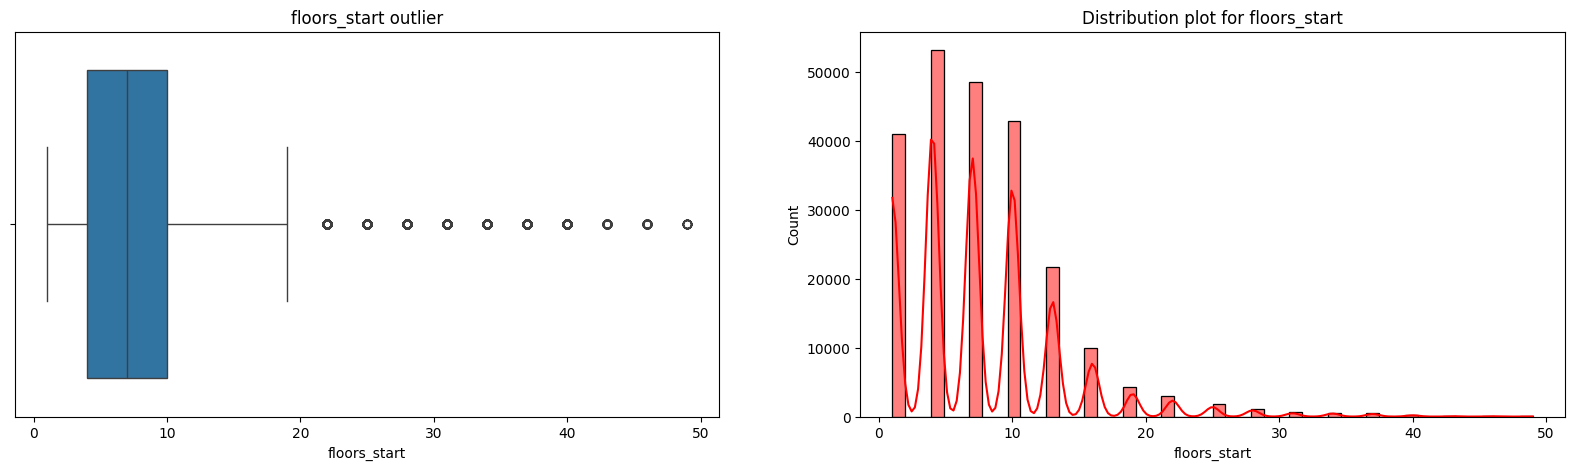

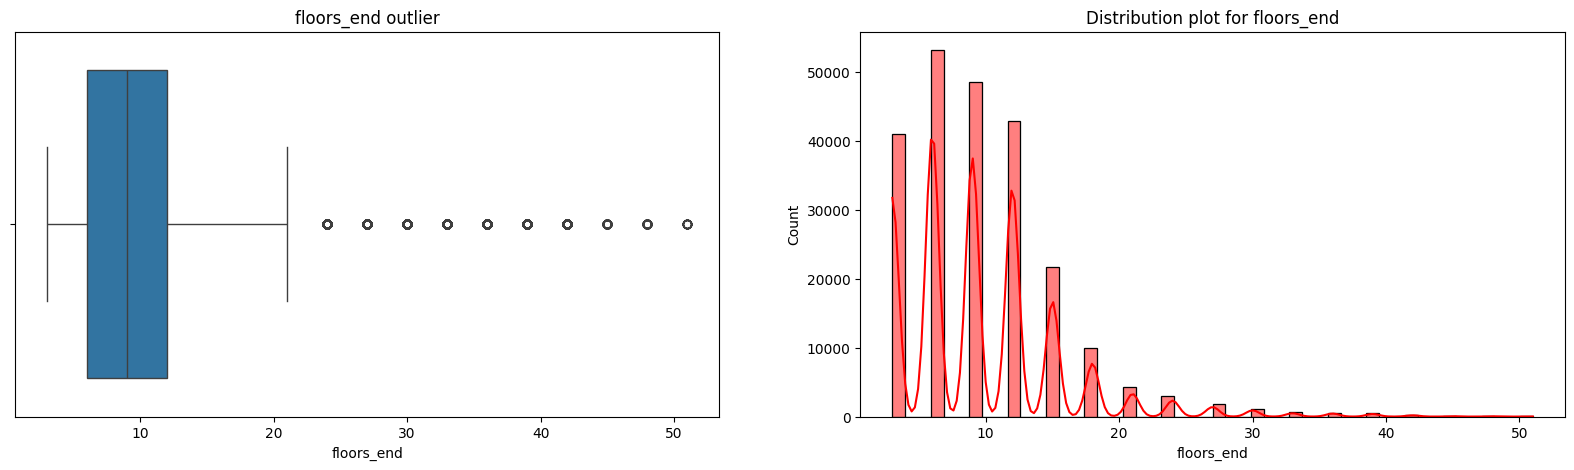

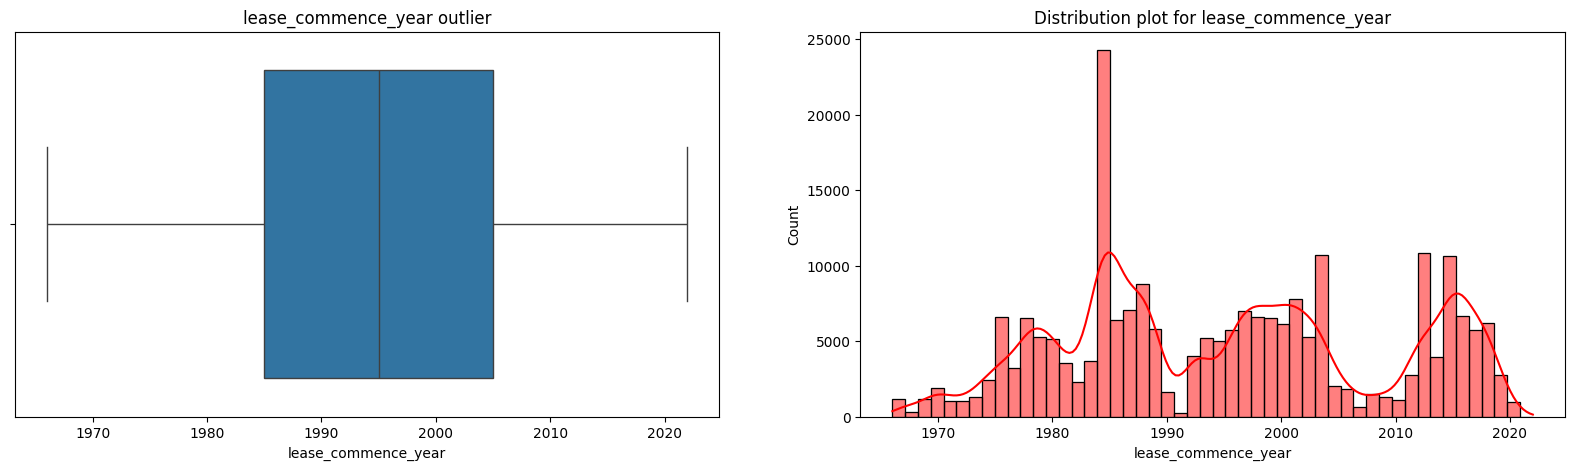

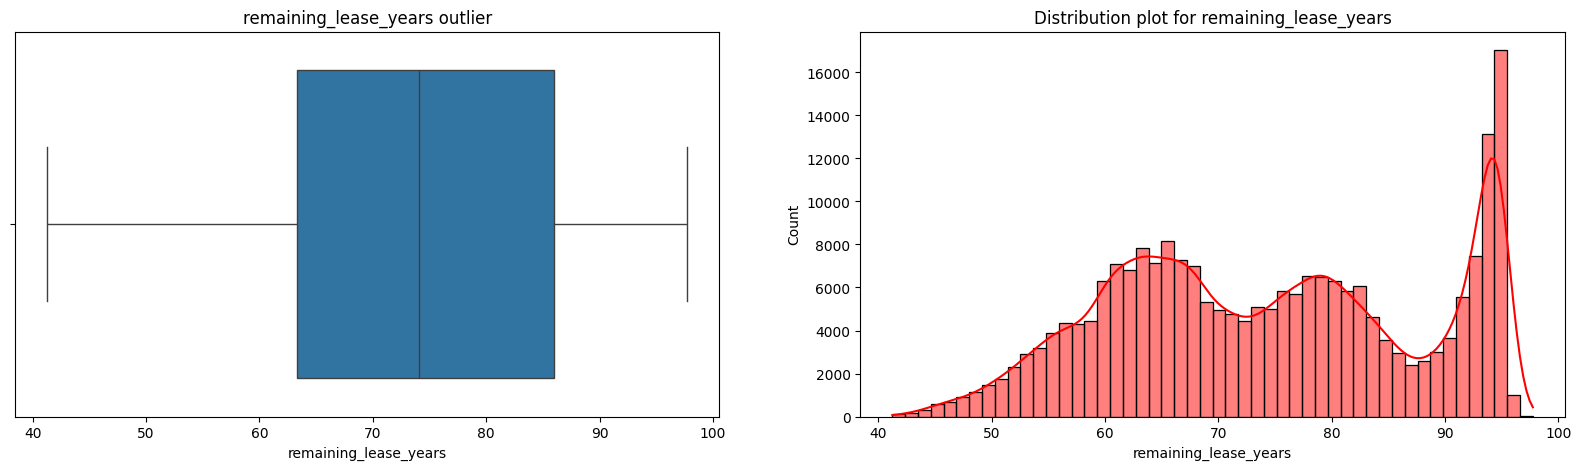

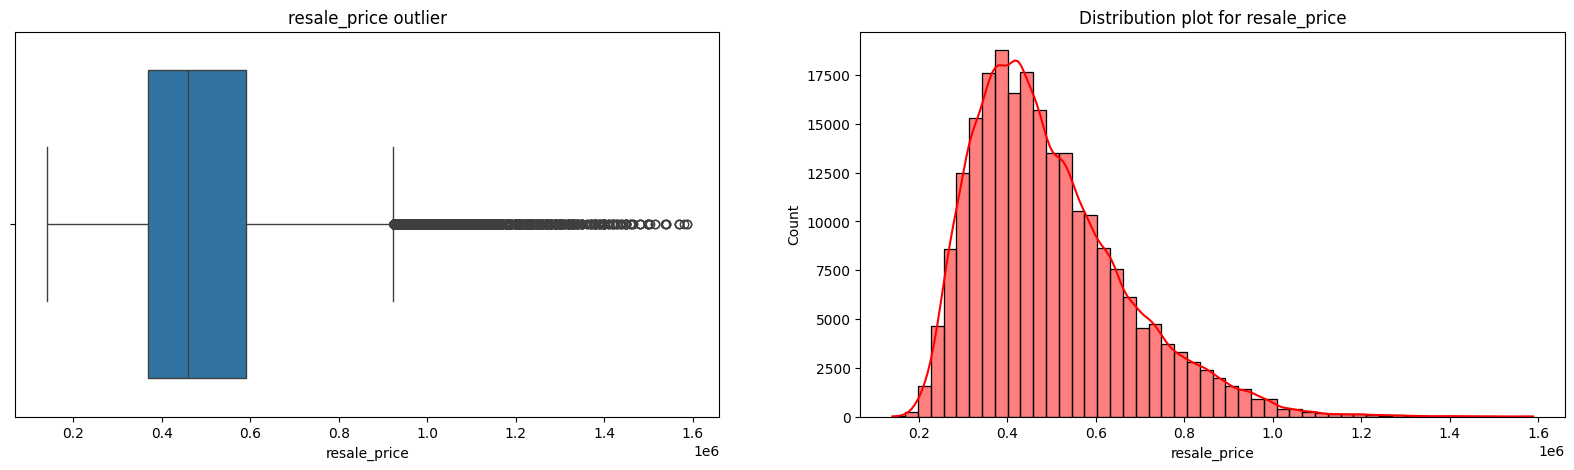

In [57]:
for i in df1.columns:
    outlier(df1, i)

Focusing Features having outliers

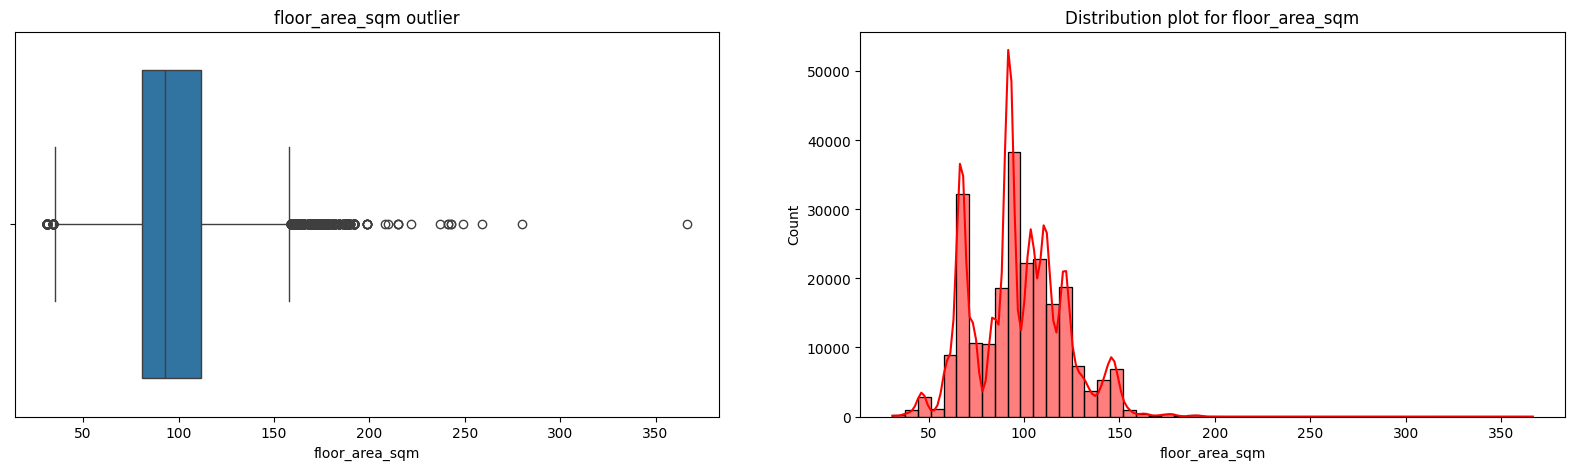

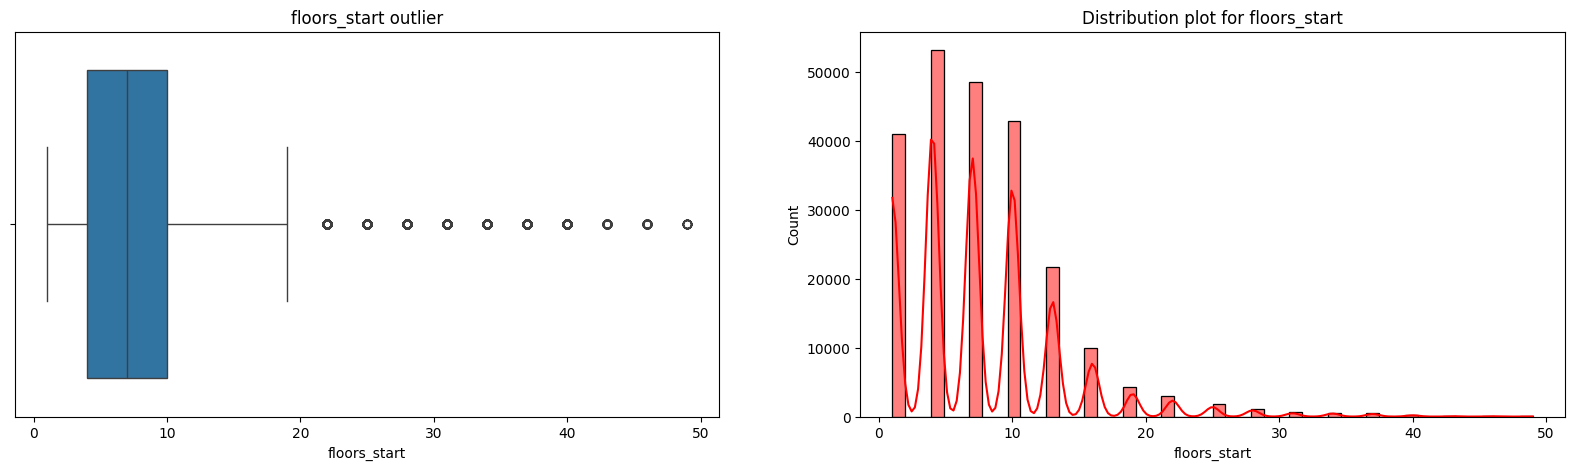

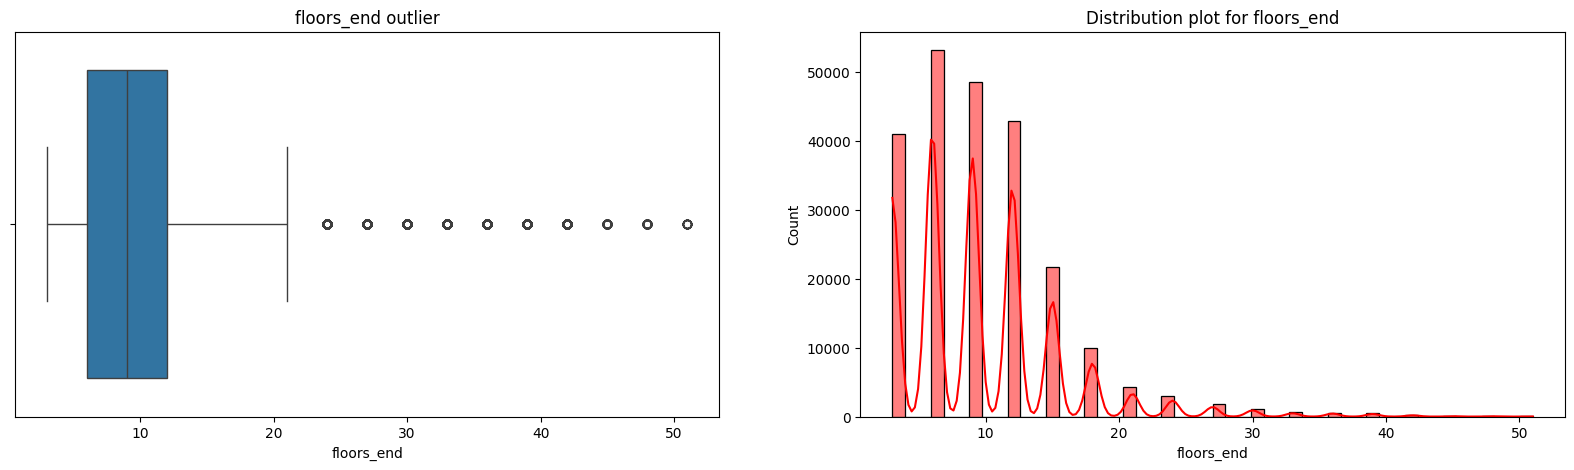

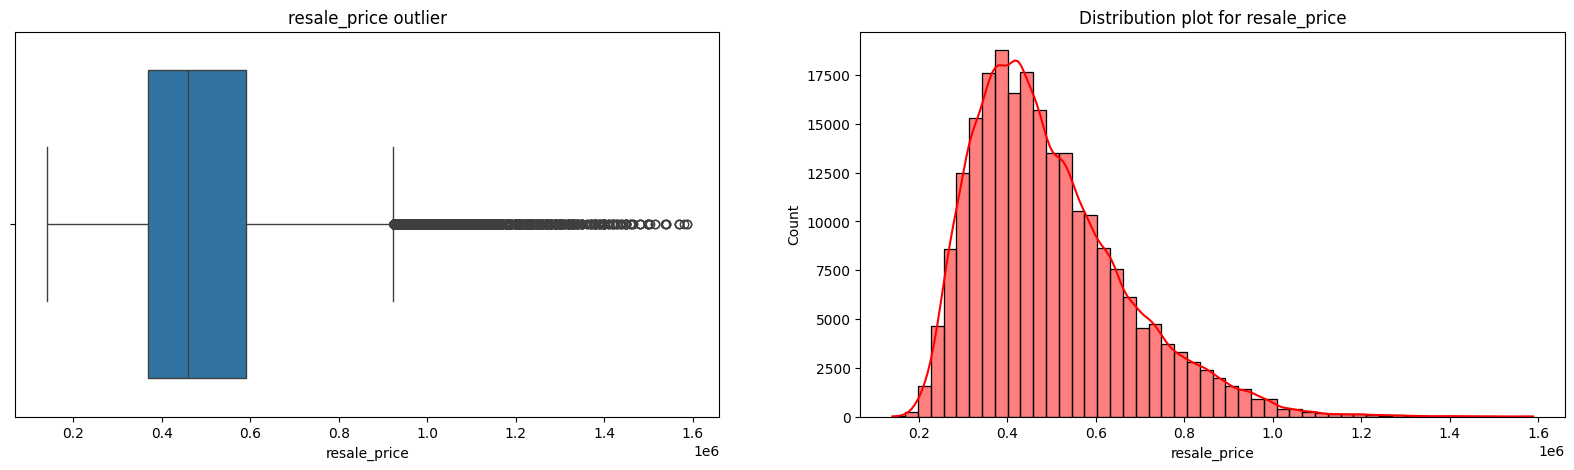

In [58]:
for i in ['floor_area_sqm', 'floors_start', 'floors_end', 'resale_price']:
    outlier(df1, i)

## Z-Score (Z = (X - M)/S.D)

In [59]:
#Z-Score
def detect_outliers(df):
    threshold=3
    mean=np.mean(df)
    std=np.std(df)

    outliers=[]
    for i in df:
        z_score=(i-mean)/std
        #print(z_score)
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers   

Collected outlier values with the help of Z_score

In [60]:
out_values=detect_outliers(df1['floor_area_sqm'])
print('Number of outliers detected from Floor area sqm : ',len(out_values))
print('Minimum value : ',min(out_values))
print('Maximum value : ',max(out_values))

Number of outliers detected from Floor area sqm :  683
Minimum value :  170.0
Maximum value :  366.7


In [61]:
out_values=detect_outliers(df1['floors_start'])
print('Number of outliers detected from Floor start : ',len(out_values))
print('Minimum value : ',min(out_values))
print('Maximum value : ',max(out_values))

Number of outliers detected from Floor start :  3199
Minimum value :  28
Maximum value :  49


In [62]:
out_values=detect_outliers(df1['floors_end'])
print('Number of outliers detected from Floor end : ',len(out_values))
print('Minimum value : ',min(out_values))
print('Maximum value : ',max(out_values))

Number of outliers detected from Floor end :  3199
Minimum value :  30
Maximum value :  51


In [63]:
out_values=detect_outliers(df1['resale_price'])
print('Number of outliers detected from Resale Price : ',len(out_values))
print('Minimum value : ',min(out_values))
print('Maximum value : ',max(out_values))

Number of outliers detected from Resale Price :  1877
Minimum value :  1011500.0
Maximum value :  1588000.0


In [64]:
#Display the sum of outliers
Total=667+3098+3098+1770
Avg=(Total/223940)*100
print('Total number of outliers in Singapore DataSet : ', Total)
print('Percentage of Outlier : ', round(Avg, 2))

Total number of outliers in Singapore DataSet :  8633
Percentage of Outlier :  3.86


In [65]:
df1.shape

(229449, 10)

In [66]:
#Taking two copy's for two different analysis
df2=df1.copy()
df3=df1.copy()

## IQR with clip function (Capping)

In [67]:
#IQR and clip function(If the original element is less than the specified lower limit, it is replaced with the lower limit, same for the upper limit too )
def iqr(df, col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-(1.5*IQR)
    upper_bound=Q3+(1.5*IQR)
    print(lower_bound, upper_bound)
    df[col]=df[col].clip(lower_bound, upper_bound)

In [68]:
import warnings
warnings.filterwarnings("ignore")

for i in ['floor_area_sqm', 'floors_start', 'floors_end', 'resale_price']:
    iqr(df2, i)

34.5 158.5
-5.0 19.0
-3.0 21.0
35000.0 923000.0


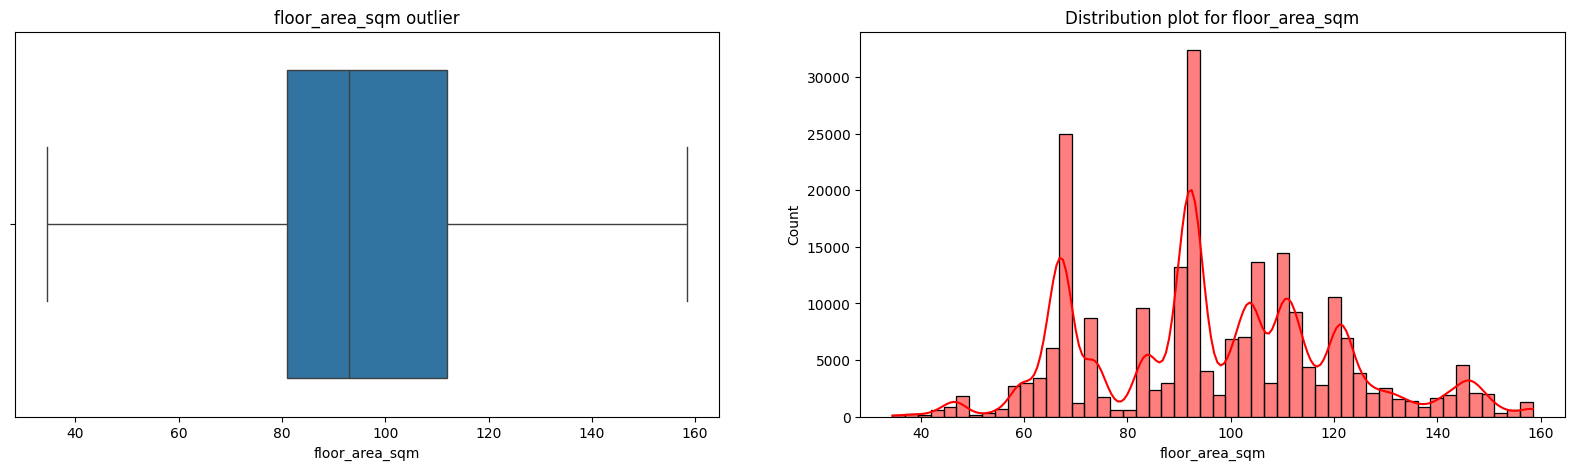

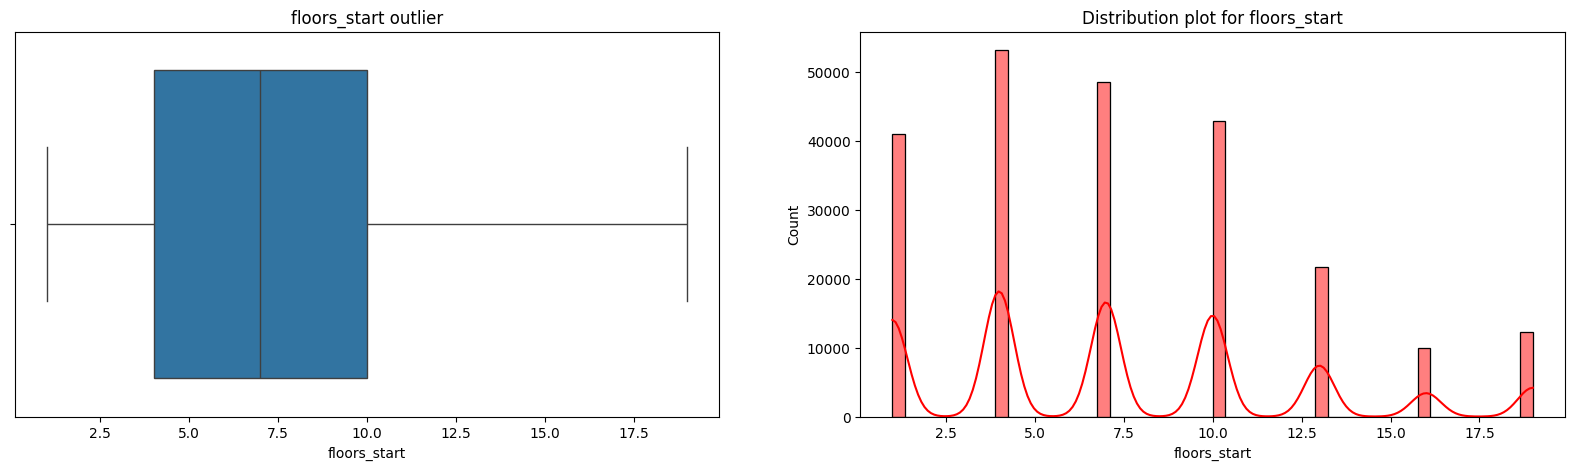

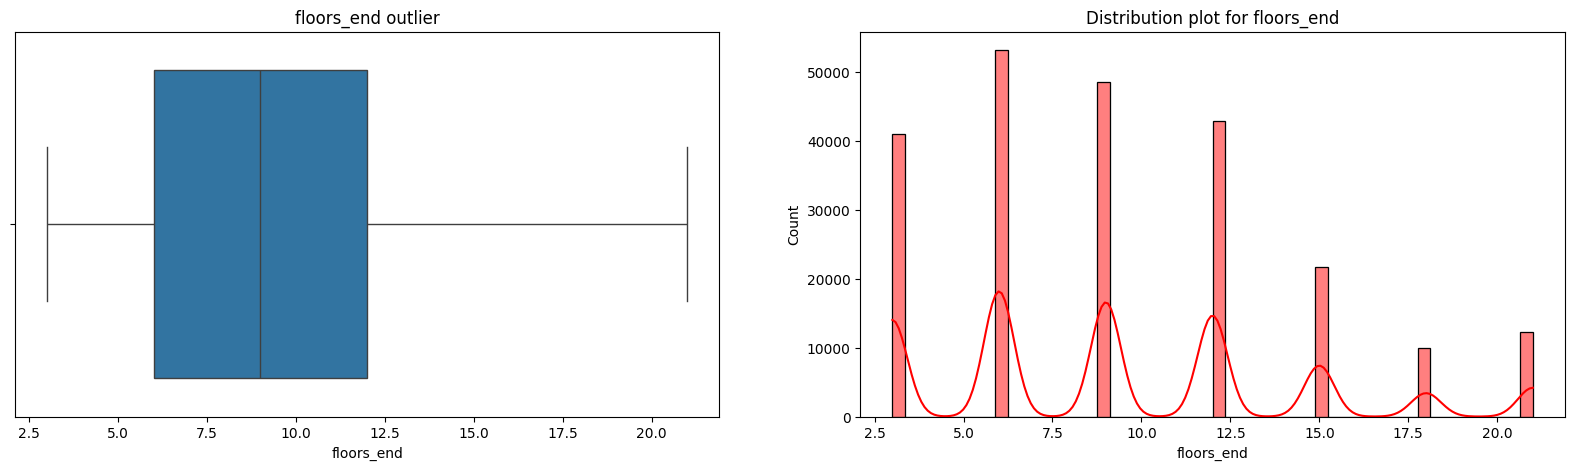

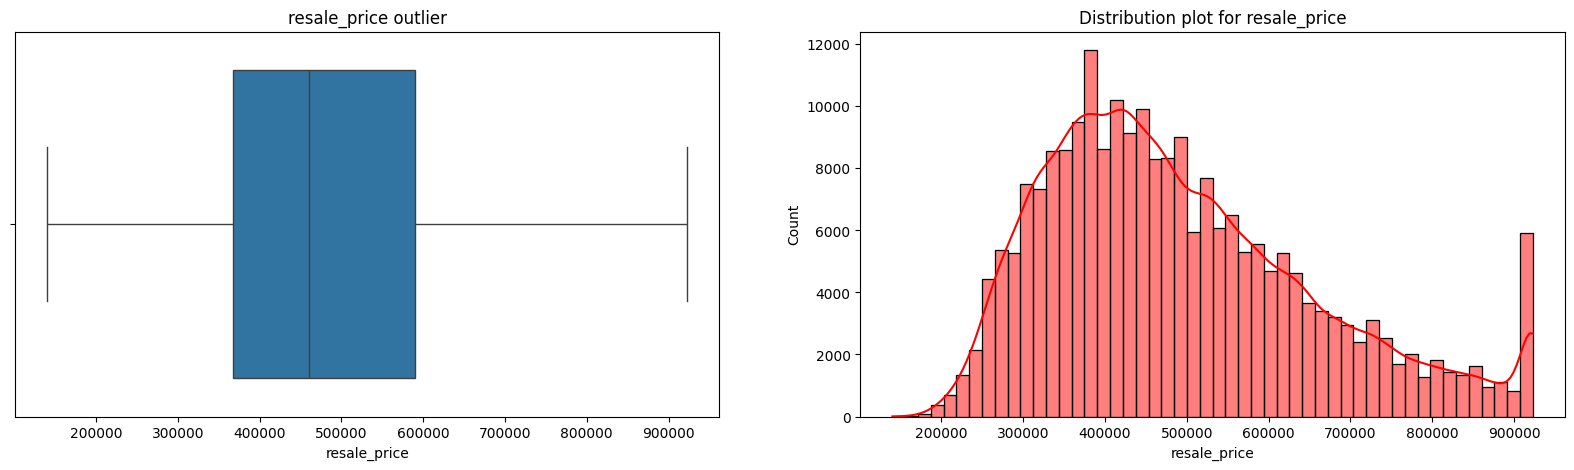

In [69]:
for i in ['floor_area_sqm', 'floors_start', 'floors_end', 'resale_price']:
    outlier(df2, i)

Interpretation

Outliers have been cleared out, but still we can see sknewness in features(Right skew).

In [70]:
#Feature Engineering (Scaling down the data to reduce the outlier distances)
df3['floors_start']=np.log(df3['floors_start'])
df3['floors_end']=np.log(df3['floors_end'])
df3['resale_price']=np.log(df3['resale_price'])

In [71]:
#Calling iqr function to handle outlier
for i in ['floor_area_sqm', 'floors_start', 'floors_end', 'resale_price']:
    iqr(df3, i)

34.5 158.5
0.011858263308657468 3.677021190805279
0.7520386983881369 3.5246274206279185
12.107778819054817 13.995937213978154


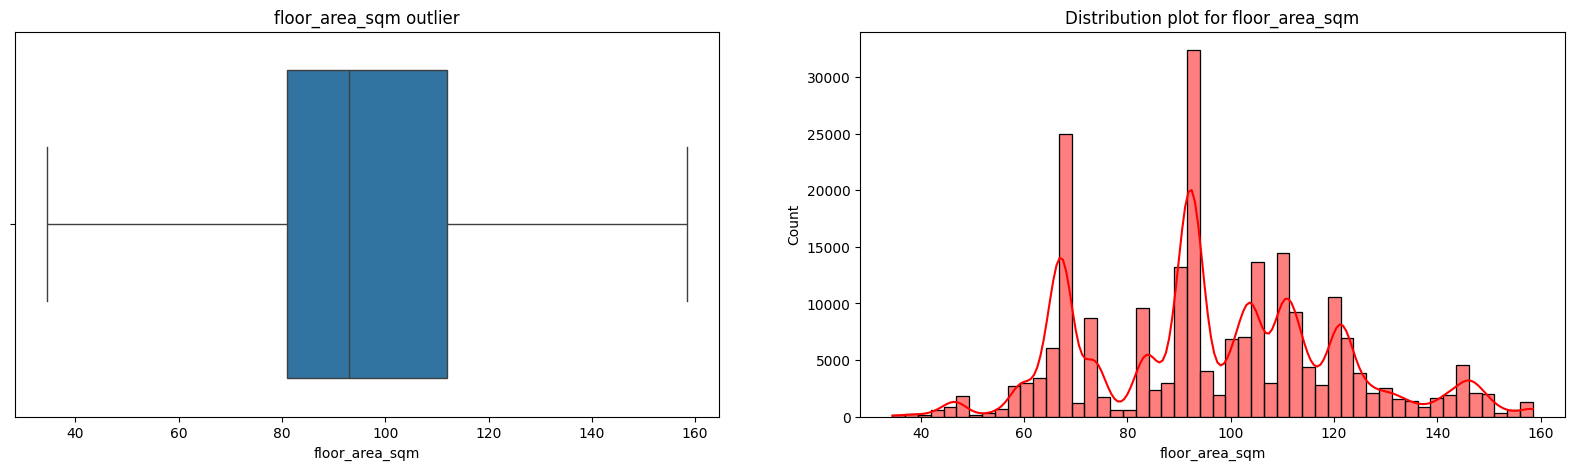

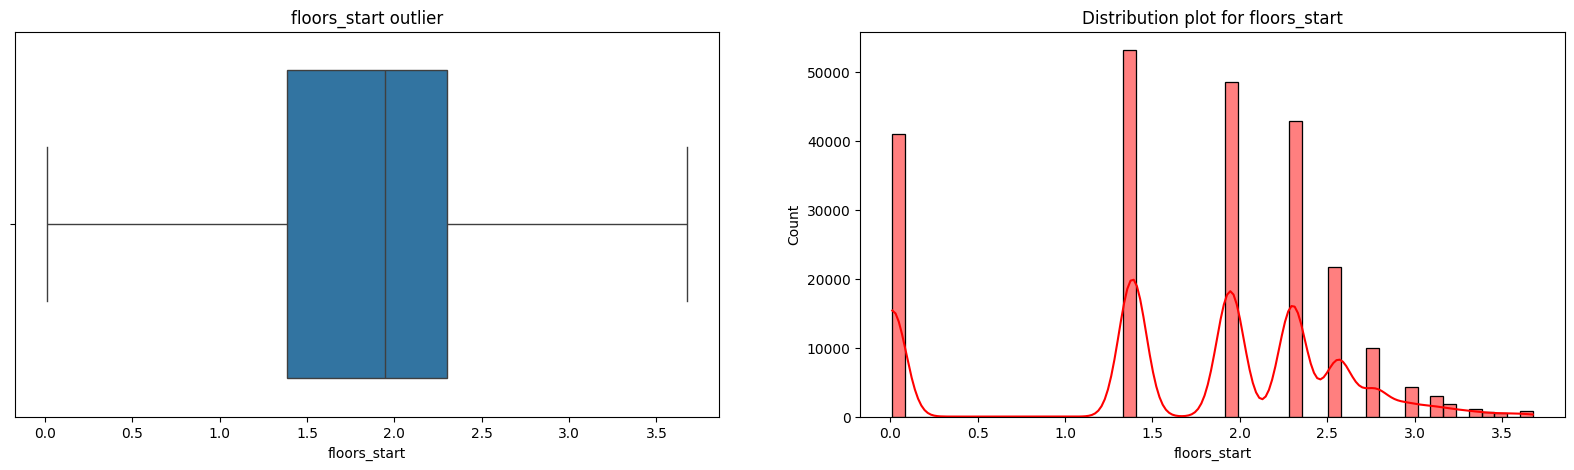

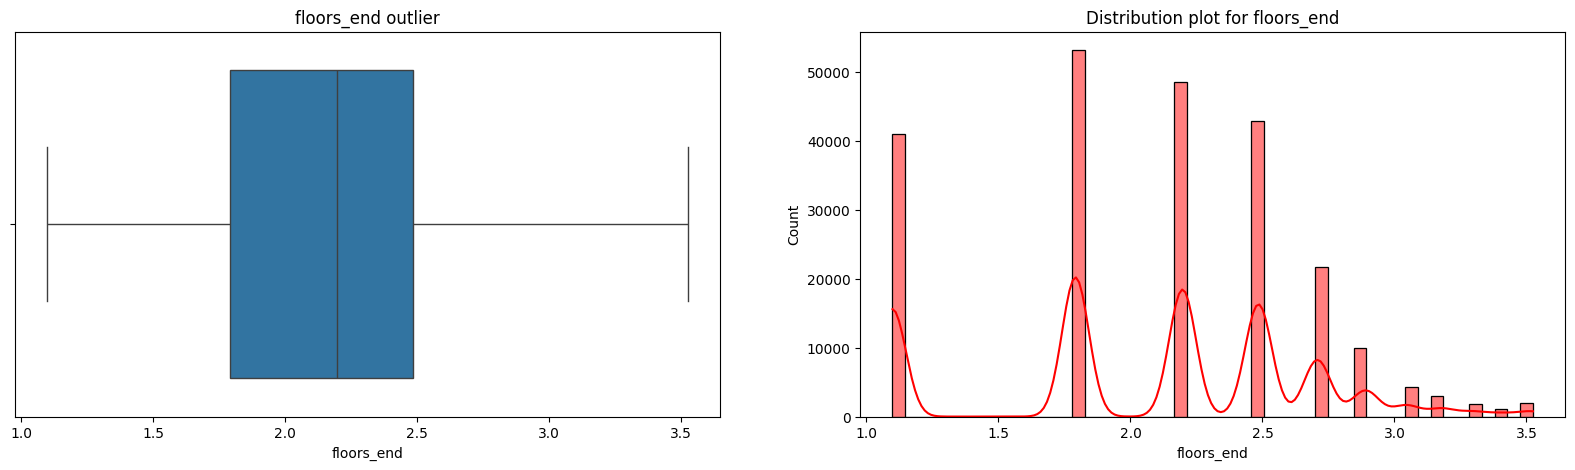

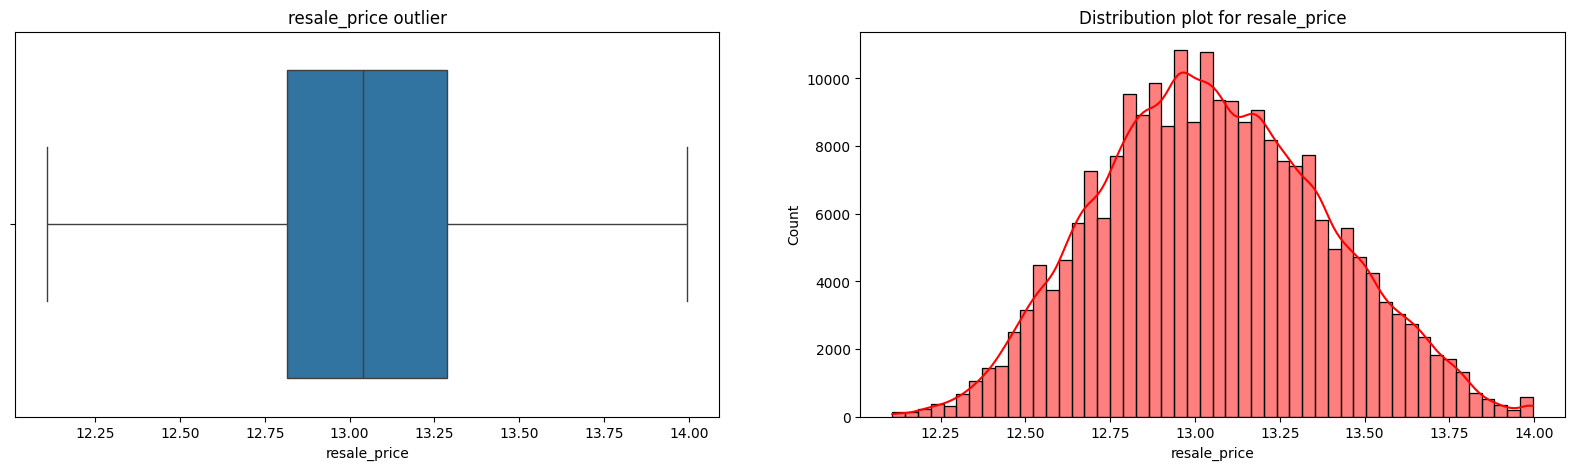

In [72]:
#Plot
for i in ['floor_area_sqm', 'floors_start', 'floors_end', 'resale_price']:
    outlier(df3, i)

## Sknewness and Kurtosis

In [73]:
from scipy.stats import skew, kurtosis

#### Kurtosis

- D = 3 (Laplace distribution)
- S = 2 (Hyperbolic secant distribution)
- L = 1.2 (Logistic distribution)
- N = 0 (Normal distribution)
- C = -0.59376 ( Raised cosine distribution)
- W = -1 (Wigner semicircle distribution)
- U = -1.2 (Uniform distribution)

Note : Kurtosis values and based on the data distribution

In [74]:
#Skewness
#To calculate how my date spreaded either left or right(left snew means negative right sknew means positive)
skewness=df3.apply(skew)
kurtosis=df3.apply(kurtosis)

result = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis
})
result

,Skewness,Kurtosis
year,-0.172032,-1.139888
town,-0.274096,-1.207891
flat_type,0.206899,-0.399312
floor_area_sqm,0.191016,-0.370524
flat_model,0.571723,-0.465303
floors_start,-0.666770,-0.426294
floors_end,-0.203421,-0.612568
lease_commence_year,0.129611,-1.078732
remaining_lease_years,0.004646,-1.097684
resale_price,0.135068,-0.391060


Interpretation

- Skewness ≈ 0. Most of our feature distribution is perfectly symmetrical around the mean. It clearly shows we handle the data skewness well.

- Kurtosis, Our feature distributions are falls under these three category - Normal distribution, Raised cosine distribution and Uniform distribution.

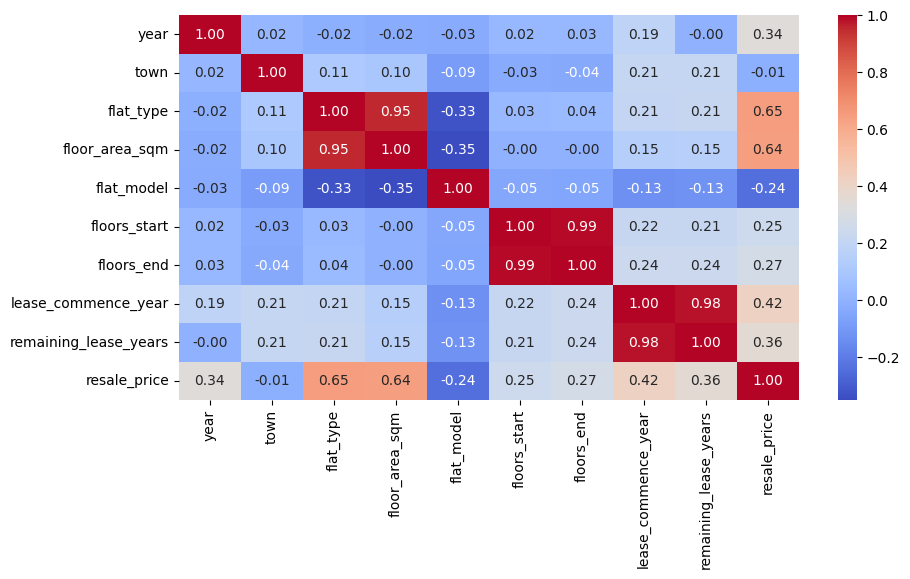

In [75]:
plt.figure(figsize=(10,5))
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm', fmt='0.2f')
plt.show()

In [76]:
df3.to_csv('H:/Python/Singapore/ResaleFlatPrices/file1.csv', index=False)

## Machine Learning

In [77]:
#Importing neccessary Regression models packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pickle

#### Finding the Best Regressor model for this dataset

In [78]:
#Splitting the features and target variable
X=df3.drop('resale_price', axis=1)
Y=df3['resale_price']
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(183559, 9)
(45890, 9)
(183559,)
(45890,)


In [79]:
class RegressorModel():
    def __init__(self, X_train, X_test, Y_train, Y_test):
        self.X_train=X_train
        self.X_test=X_test
        self.Y_train=Y_train
        self.Y_test=Y_test

    def linearRegression(self):
        reg=LinearRegression()
        reg.fit(X_train, Y_train)
        Y_pred_train=reg.predict(X_train)
        Y_pred_test=reg.predict(X_test)
        R2_train=r2_score(Y_train, Y_pred_train)
        R2_test=r2_score(Y_test, Y_pred_test)

        print(f'LinearRegression accuracy score of Train : {R2_train} and Test : {R2_test}')
        print('-----------------------------------------------------------------------------') 

    def knnRegression(self):
        reg=KNeighborsRegressor().fit(X_train, Y_train)
        Y_pred_train=reg.predict(X_train)
        Y_pred_test=reg.predict(X_test)
        R2_train=r2_score(Y_train, Y_pred_train)
        R2_test=r2_score(Y_test, Y_pred_test)  

        print(f'KnnRegression accuracy score of Train : {R2_train} and Test : {R2_test}')
        print('-----------------------------------------------------------------------------') 

    def decisionTree(self):     
        reg=DecisionTreeRegressor()
        reg.fit(X_train, Y_train)
        Y_pred_train=reg.predict(X_train)
        Y_pred_test=reg.predict(X_test)
        R2_train=r2_score(Y_train, Y_pred_train)
        R2_test=r2_score(Y_test, Y_pred_test)

        print(f'DecisionTree accuracy score of Train : {R2_train} and Test : {R2_test}')
        print('-----------------------------------------------------------------------------')
    
    def randomForest(self):
        reg=RandomForestRegressor().fit(X_train, Y_train)
        Y_pred_train=reg.predict(X_train)
        Y_pred_test=reg.predict(X_test)
        R2_train=r2_score(Y_train, Y_pred_train)
        R2_test=r2_score(Y_test, Y_pred_test)

        print(f'RandomForest accuracy score of Train : {R2_train} and Test : {R2_test}')
        print('-----------------------------------------------------------------------------')

    def gradientBoosting(self):
        reg=GradientBoostingRegressor().fit(X_train, Y_train)
        Y_pred_train=reg.predict(X_train)
        Y_pred_test=reg.predict(X_test)
        R2_train=r2_score(Y_train, Y_pred_train)
        R2_test=r2_score(Y_test, Y_pred_test)

        print(f'GradientBoosting accuracy score of Train : {R2_train} and Test : {R2_test}')
        print('-----------------------------------------------------------------------------')

    def adaBoosting(self):
        reg=AdaBoostRegressor().fit(X_train, Y_train)
        Y_pred_train=reg.predict(X_train)
        Y_pred_test=reg.predict(X_test)
        R2_train=r2_score(Y_train, Y_pred_train)
        R2_test=r2_score(Y_test, Y_pred_test)

        print(f'AdaBoostRegressor accuracy score of Train : {R2_train} and Test : {R2_test}')
        print('-----------------------------------------------------------------------------')

    def extraTree(self):
        reg=ExtraTreesRegressor().fit(X_train, Y_train)
        Y_pred_train=reg.predict(X_train)
        Y_pred_test=reg.predict(X_test)
        R2_train=r2_score(Y_train, Y_pred_train)
        R2_test=r2_score(Y_test, Y_pred_test)

        print(f'ExtraTreesRegressor accuracy score of Train : {R2_train} and Test : {R2_test}')
        print('-----------------------------------------------------------------------------')

    def xgBooster(self):
        reg=XGBRegressor().fit(X_train, Y_train)
        Y_pred_train=reg.predict(X_train)
        Y_pred_test=reg.predict(X_test)
        R2_train=r2_score(Y_train, Y_pred_train)
        R2_test=r2_score(Y_test, Y_pred_test)

        print(f'XGBRegressor accuracy score of Train : {R2_train} and Test : {R2_test}')
        print('-----------------------------------------------------------------------------')    



In [80]:
model=RegressorModel(X_train, X_test, Y_train, Y_test)
accuracy_score={
    'LinearRegression' : model.linearRegression(),
    'KNnRegression' : model.knnRegression(),
    'DecisionTree': model.decisionTree(),
    'RandomForest': model.randomForest(),
    'GradientBoosting': model.gradientBoosting(),
    'AdaBoosting': model.adaBoosting(),
    'ExtraTree' : model.extraTree(),
    'XGBooster' : model.xgBooster()
}

LinearRegression accuracy score of Train : 0.6802248145072403 and Test : 0.6822824310874216
-----------------------------------------------------------------------------
KnnRegression accuracy score of Train : 0.9626667030066214 and Test : 0.9423898177114225
-----------------------------------------------------------------------------
DecisionTree accuracy score of Train : 0.9963319344198904 and Test : 0.9306121796009541
-----------------------------------------------------------------------------
RandomForest accuracy score of Train : 0.9914278849733775 and Test : 0.9566078125030016
-----------------------------------------------------------------------------
GradientBoosting accuracy score of Train : 0.8699484698662165 and Test : 0.8709415478427139
-----------------------------------------------------------------------------
AdaBoostRegressor accuracy score of Train : 0.6797147584387246 and Test : 0.680546628815609
---------------------------------------------------------------------

Interpretation

RandomForst, ExtraTree and XGBooster model's achieved highest accuracy score of 0.9561516170145773, 0.9472670061645567, 0.9535227248826977 respectively.

Amoung these three, RandomForst model has achieved highest accuracy(96%) and it doesn't require any Scaling or Hyperparameter tuning techniques.

#### Builidng RandomForest Model

In [81]:
reg_model=RandomForestRegressor()
reg_model.fit(X_train, Y_train)

Y_pred=reg_model.predict(X_test)
mae=mean_absolute_error(Y_test, Y_pred)
mse=mean_squared_error(Y_test, Y_pred)
rmse=np.sqrt(mse)
r2=r2_score(Y_test, Y_pred)

reg_metrics={
            'R2 ': r2,
            'Mean Absolute error ': mae,
            'Mean Squared error ': mse,
            'Root Mean Squared error ': rmse}

reg_metrics

{'R2 ': 0.9566794614940652,
 'Mean Absolute error ': np.float64(0.050907010485227513),
 'Mean Squared error ': np.float64(0.004858226805004469),
 'Root Mean Squared error ': np.float64(0.06970098137762817)}

In [82]:
#Serializing (Byte stream)
with open('H:/Python/Singapore/ResaleFlatPrices/Regression_model.pkl', 'wb') as file:
    pickle.dump(reg_model, file)

In [83]:
#Deserializing(Predict the selling price)
with open('H:/Python/Singapore/ResaleFlatPrices/Regression_model.pkl', 'rb') as file:
    Reg_model=pickle.load(file)

In [84]:
Reg_model

RandomForestRegressor()

In [85]:
#choosing random feature values
X.loc[[345, 347, 19090]]

,year,town,flat_type,floor_area_sqm,flat_model,floors_start,floors_end,lease_commence_year,remaining_lease_years
345,2015,7,3.0,93.0,19.0,3.526361,3.524627,2011,95.0
347,2015,7,3.0,97.0,19.0,3.677021,3.524627,2011,95.0
19090,2016,0,3.0,98.0,12.0,2.302585,2.484907,1978,61.0


In [86]:
#Predicting the Resale flat price
result=Reg_model.predict(np.array([[2015, 7, 3.0, 97.0, 19.0, 3.677021, 3.524627, 2011, 95.0]]))
print(result)
print(np.exp(result[0]))

[13.75847689]
944562.2671005271
